Question 1

In [35]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

s3 = boto3.resource('s3')
bucket_name = 'grant-gonnerman-data-445'
bucket = s3.Bucket(bucket_name)

file_key = 'College.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# reading data file
college = pd.read_csv(file_content_stream)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [36]:
college['Private'].replace(['Yes', 'No'], [1, 0], inplace = True)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [37]:
# defining input and target variables 
x = college[['Private', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'S.F.Ratio', 'Grad.Rate']]
y = college['Apps']

# splitting the data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

#transforming the input data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [38]:
# Building the linear model 
lm_md = LinearRegression().fit(x_train, y_train)
lm_pred = lm_md.predict(x_test)
print('The mse of the linear model is:', np.mean((y_test - lm_pred)**2))

The mse of the linear model is: 2862387.251869721


In [39]:
# ridge regression
ridge_cv = RidgeCV(alphas =  np.linspace(0.001,100, num = 100), cv = 5).fit(x_train, y_train)

# Extracting
cv_lambda = ridge_cv.alpha_
print('the best lambda of the ridge model is:', cv_lambda)

# building the model
ridge_md = Ridge(alpha = cv_lambda).fit(x_train, y_train)

# predicting on the test data
ridge_pred = ridge_md.predict(x_test)

#calculating mse 
mse = np.mean(np.power(y_test - ridge_pred, 2))
print('the mse of the ridge model is: ', mse)

the best lambda of the ridge model is: 0.001
the mse of the ridge model is:  2861873.6209456366


In [40]:
# estimanting lambda for lasso 
lasso_cv = LassoCV(alphas = np.linspace(0.001,100, num = 100), normalize = True, cv = 5).fit(x_train, y_train)

#extracting
cv_lambda = lasso_cv.alpha_
print('the estimated value for the lasso model is', cv_lambda)

# building the model
lasso_md = Lasso(alpha = cv_lambda, normalize = True).fit(x_train, y_train)

# predicting on test data
lasso_pred = lasso_md.predict(x_test)

#calculating mse 
mse2 = np.mean(np.power(y_test - lasso_pred, 2))
print('the mse of the ridge model is: ', mse2)

the estimated value for the lasso model is 1.011090909090909
the mse of the ridge model is:  2670204.3184563457


/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing

In [41]:
# based on the mse results i would use the lasso model because it had the lowest mse

Question 2

In [53]:
file_key2 = 'churn-bigml-80.csv'

bucket_object2 = bucket.Object(file_key2)
file_object2 = bucket_object2.get()
file_content_stream2 = file_object2.get('Body')

# reading data file
telecom_train = pd.read_csv(file_content_stream2)
telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [54]:
file_key3 = 'churn-bigml-20.csv'

bucket_object3 = bucket.Object(file_key3)
file_object3 = bucket_object3.get()
file_content_stream3 = file_object3.get('Body')

# reading data file
telecom_test = pd.read_csv(file_content_stream3)
telecom_test.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [55]:
# feature engineering
telecom_train['Churn'].replace([True, False], [1, 0], inplace = True)
telecom_test['Churn'].replace([True, False], [1, 0], inplace = True)

telecom_train['International_plan'].replace(['Yes', 'No'], [1, 0], inplace = True)
telecom_test['International_plan'].replace(['Yes', 'No'], [1, 0], inplace = True)

telecom_train['Voice_mail_plan'].replace(['Yes', 'No'], [1, 0], inplace = True)
telecom_test['Voice_mail_plan'].replace(['Yes', 'No'], [1, 0], inplace = True)

telecom_train['Total_charge'] = telecom_train[['Total_day_charge','Total_eve_charge', 'Total_night_charge', 'Total_intl_charge']].sum(axis = 1)
telecom_test['Total_charge'] = telecom_test[['Total_day_charge','Total_eve_charge', 'Total_night_charge', 'Total_intl_charge']].sum(axis = 1)

telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,Total_charge
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


In [56]:
telecom_train = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'Total_charge','Customer_service_calls', 'Churn']]
telecom_test = telecom_test[['Account_length', 'International_plan', 'Voice_mail_plan', 'Total_charge','Customer_service_calls', 'Churn']]
telecom_test.head()

,Account_length,International_plan,Voice_mail_plan,Total_charge,Customer_service_calls,Churn
0,117,0,0,73.32,1,0
1,65,0,0,54.20,4,1
2,161,0,0,92.29,4,1
3,111,0,0,41.05,2,0
4,49,0,0,49.60,1,0


In [57]:
# defining input and target variables
x = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'Total_charge','Customer_service_calls']]
y = telecom_train['Churn']

# list to store coefficents 
coef = list()

for i in range(0, 1000):
    # splitting the data into train and test 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, stratify = y)

    #transforming the input data
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)

    # running LASSO cross-validation to estimate optimal lambda
    lasso_cv = LassoCV(normalize = True, cv = 5).fit(x_train, y_train)
    
    # building LASSO regression with optimal lambda
    lasso_md = Lasso(alpha = lasso_cv.alpha_, normalize = True).fit(x_train, y_train)
    
    # storing estimated coefficients
    coef.append(lasso_md.coef_)
    
# putting coefficient list in data-frame
coef_data = pd.DataFrame(coef)
coef_data

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing

,0,1,2,3,4
0,0.015437,0.307055,-0.080016,0.548824,0.478039
1,-0.000000,0.304202,-0.081288,0.454150,0.498370
2,0.000000,0.313380,-0.060268,0.462127,0.500177
3,-0.000000,0.348196,-0.076176,0.486393,0.480158
4,0.000000,0.317170,-0.074369,0.398893,0.535244
...,...,...,...,...,...
995,0.005883,0.282487,-0.074846,0.524262,0.522763
996,0.034576,0.295671,-0.081982,0.479503,0.532462
997,0.030176,0.320246,-0.079099,0.524174,0.518685
998,0.000000,0.306798,-0.076997,0.430866,0.519237


In [58]:
sum(coef_data[0] == 0.0)

282

In [59]:
# dropping account length from the datasets
telecom_train = telecom_train.drop(columns = ['Account_length'], axis = 1)
telecom_test = telecom_test.drop(columns = ['Account_length'], axis = 1)
telecom_train.head()

,International_plan,Voice_mail_plan,Total_charge,Customer_service_calls,Churn
0,0,1,75.56,1,0
1,0,1,59.24,1,0
2,0,0,62.29,0,0
3,1,0,66.80,2,0
4,1,0,52.09,3,0


the average recall over all iterations for model 1 is: 0.8757226107226107
the average recall over all iterations for model 2 is: 0.8981981351981354
the average recall over all iterations for model 3 is: 0.8728358308358307
the average recall over all iterations for model 4 is: 0.8870139860139861


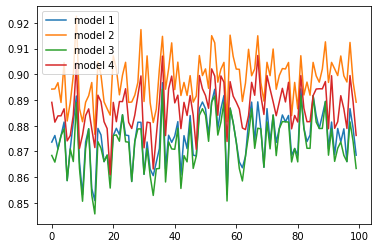

In [60]:
# list to store results
md1_results = list()
md2_results = list()
md3_results = list()
md4_results = list()

for i in range(0,100):
    
    kfold = StratifiedKFold(n_splits = 5, shuffle = True)
    
    # list to store results
    md1_fold_results = list()
    md2_fold_results = list()
    md3_fold_results = list()
    md4_fold_results = list()
    
    for train_idx, test_idx in kfold.split(x,y):
        
        # splitting the data
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # transforming the input data
        scaler = MinMaxScaler()
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.fit_transform(x_test)
    
        # defining input and target variables
        x = telecom_train[['International_plan', 'Voice_mail_plan', 'Total_charge','Customer_service_calls']]
        y = telecom_train['Churn']
        
        ## model 1 ##
        # building logistic regression model
        logit_md1 = LogisticRegression(solver = 'liblinear', penalty= 'l1').fit(x_train, y_train)
        # predicting on the test data
        logit_pred1 = logit_md1.predict_proba(x_test)[:,1]
        # changing likelyhoods to labels
        logit_label1 = np.where(logit_pred1 < .10, 0, 1)
        # storing recall for each fold
        md1_fold_results.append(recall_score(y_test, logit_label1))
        
        ## model 2 ##
        # building logistic regression model
        logit_md2 = LogisticRegression(solver = 'liblinear', penalty= 'l2').fit(x_train, y_train)
        # predicting on the test data
        logit_pred2 = logit_md2.predict_proba(x_test)[:,1]
        # changing likelyhoods to labels
        logit_label2 = np.where(logit_pred2 < .10, 0, 1)
        # storing recall for each fold
        md2_fold_results.append(recall_score(y_test, logit_label2))
        
        ## model 3 ##
        # building logistic regression model
        logit_md3 = LogisticRegression(solver = 'saga', penalty= 'l1').fit(x_train, y_train)
        # predicting on the test data
        logit_pred3 = logit_md3.predict_proba(x_test)[:,1]
        # changing likelyhoods to labels
        logit_label3 = np.where(logit_pred3 < .10, 0, 1)
        # storing recall for each fold
        md3_fold_results.append(recall_score(y_test, logit_label3))
        
        ## model 4 ##
        # building logistic regression model
        logit_md4 = LogisticRegression(solver = 'saga', penalty= 'l2').fit(x_train, y_train)
        # predicting on the test data
        logit_pred4 = logit_md4.predict_proba(x_test)[:,1]
        # changing likelyhoods to labels
        logit_label4 = np.where(logit_pred4 < .10, 0, 1)
        # storing recall for each fold
        md4_fold_results.append(recall_score(y_test, logit_label4))
        
    # storing average recall over 5 folds
    md1_results.append(np.mean(md1_fold_results))
    md2_results.append(np.mean(md2_fold_results))
    md3_results.append(np.mean(md3_fold_results))
    md4_results.append(np.mean(md4_fold_results))
        
index = np.linspace(0, 99, 100)

plt.plot(index, md1_results)
plt.plot(index, md2_results)
plt.plot(index, md3_results)
plt.plot(index, md4_results)
plt.legend(["model 1", "model 2", "model 3", "model 4"], loc = "upper left")
        
print("the average recall over all iterations for model 1 is:", np.mean(md1_results))
print("the average recall over all iterations for model 2 is:", np.mean(md2_results))
print("the average recall over all iterations for model 3 is:", np.mean(md3_results))
print("the average recall over all iterations for model 4 is:", np.mean(md4_results))

In [18]:
# of the models with solver = ’liblinear’ i would choose model 2 because it looks to have the higher recall in the chart and a higher average overall
# of the models with solver = ’saga’ i would choose model 4 because it looks to have the higher recall in the chart and a higher average overall

In [61]:
# defining input and target variables
x_train = telecom_train[['International_plan', 'Voice_mail_plan', 'Total_charge','Customer_service_calls']]
x_test = telecom_test[['International_plan', 'Voice_mail_plan', 'Total_charge','Customer_service_calls']]
y_train = telecom_train['Churn']
y_test = telecom_test['Churn']

# transforming the input data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## model 2 ##
# building logistic regression model
logit_md2 = LogisticRegression(solver = 'liblinear', penalty= 'l2').fit(x_train, y_train)
# predicting on the test data
logit_pred2 = logit_md2.predict_proba(x_test)[:,1]
# changing likelyhoods to labels
logit_label2 = np.where(logit_pred2 < .10, 0, 1)
# reporting recall
print('recall of model 2:', recall_score(y_test, logit_label2))

 ## model 4 ##
# building logistic regression model
logit_md4 = LogisticRegression(solver = 'saga', penalty= 'l2').fit(x_train, y_train)
# predicting on the test data
logit_pred4 = logit_md4.predict_proba(x_test)[:,1]
# changing likelyhoods to labels
logit_label4 = np.where(logit_pred4 < .10, 0, 1)
# reporting recall
print('recall of model 4:', recall_score(y_test, logit_label4))

recall of model 2: 0.9157894736842105
recall of model 4: 0.9157894736842105


In [62]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, logit_label2)

array([[310, 262],
       [  8,  87]])

In [63]:
confusion_matrix(y_test, logit_label4)

array([[321, 251],
       [  8,  87]])

In [ ]:
# from the above results both models would be good options to predict churn. taking the results from part f into account i would choose model 2 because
# it performed better over 100 iterations. 